In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Data/students_habit_study_hours.csv')
df = df.iloc[:, 1:]
df.head()
# Creating two other dataframes
df1 = df.drop(['mental_health_rating', 'exam_score'], axis=1)
df2 = df[['study_hours_per_day', 'mental_health_rating', 'exam_score']]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


From this code, three dataframes are created:
- The whole dataframe
- The whold dataframe minus the mental_health_rating and exam_score
- Only mental_health_rating, exam_score and study_hours_per_day

#Linear Regression, Decision Tree Regression, Random Forest Regression on these three dataframes

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
def model(df):
  # Separate features and target variable
  X = df.drop('study_hours_per_day', axis=1)
  y = df['study_hours_per_day']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Initialize models
  models = {
      "Linear Regression": LinearRegression(),
      "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
      "Random Forest Regression": RandomForestRegressor(random_state=42)
  }

  # Train models and evaluate
  results = {}
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      results[name] = {"MSE": mse, "R^2": r2}

  # Print results
  for name, metrics in results.items():
      print(f"Model: {name}")
      print(f"  Mean Squared Error (MSE): {metrics['MSE']:.4f}")
      print(f"  R-squared (R^2): {metrics['R^2']:.4f}")
      print("-" * 30)
  return None

model(df)
model(df1)
model(df2)

Model: Linear Regression
  Mean Squared Error (MSE): 0.2436
  R-squared (R^2): 0.8762
------------------------------
Model: Decision Tree Regression
  Mean Squared Error (MSE): 0.8388
  R-squared (R^2): 0.5736
------------------------------
Model: Random Forest Regression
  Mean Squared Error (MSE): 0.3837
  R-squared (R^2): 0.8050
------------------------------
Model: Linear Regression
  Mean Squared Error (MSE): 2.0061
  R-squared (R^2): -0.0198
------------------------------
Model: Decision Tree Regression
  Mean Squared Error (MSE): 4.8868
  R-squared (R^2): -1.4841
------------------------------
Model: Random Forest Regression
  Mean Squared Error (MSE): 2.2684
  R-squared (R^2): -0.1531
------------------------------
Model: Linear Regression
  Mean Squared Error (MSE): 0.4812
  R-squared (R^2): 0.7554
------------------------------
Model: Decision Tree Regression
  Mean Squared Error (MSE): 0.8990
  R-squared (R^2): 0.5430
------------------------------
Model: Random Forest Regre

#Feature Importance on the whole data and training on the selected_features dataframe consisting of the top 6 columns

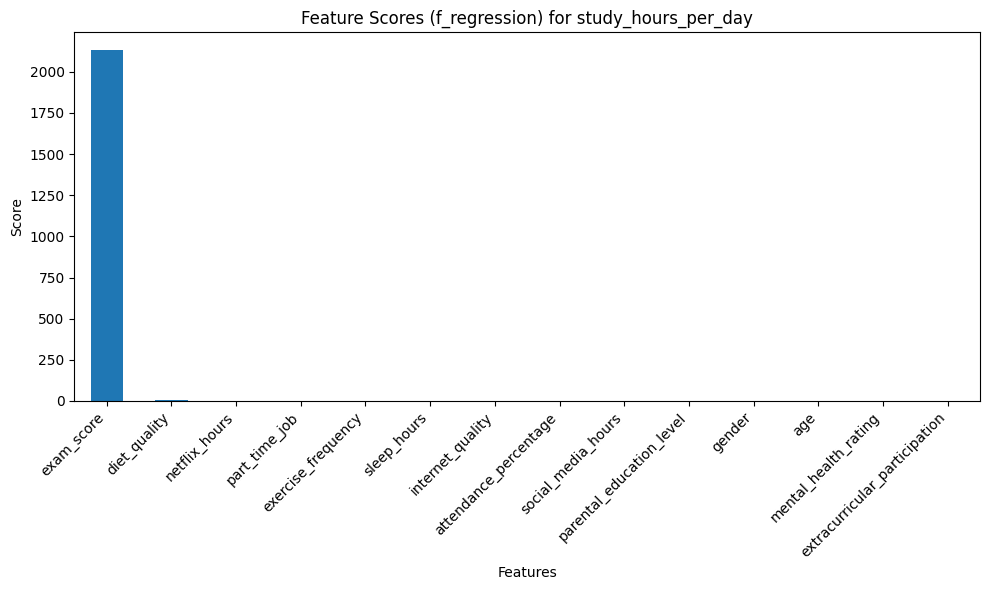


Selected features (top 6): ['netflix_hours', 'part_time_job', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'exam_score']

Training models with selected features:
Model: Linear Regression
  Mean Squared Error (MSE): 0.5573
  R-squared (R^2): 0.7167
------------------------------
Model: Decision Tree Regression
  Mean Squared Error (MSE): 1.4273
  R-squared (R^2): 0.2745
------------------------------
Model: Random Forest Regression
  Mean Squared Error (MSE): 0.6972
  R-squared (R^2): 0.6456
------------------------------


In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target variable
X = df.drop('study_hours_per_day', axis=1)
y = df['study_hours_per_day']

# Apply SelectKBest with f_regression score function
# We'll select the top k features, let's start by visualizing scores for all features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Get scores and feature names
feature_scores = pd.Series(selector.scores_, index=X.columns)
feature_scores_sorted = feature_scores.sort_values(ascending=False)

# Plot the scores
plt.figure(figsize=(10, 6))
feature_scores_sorted.plot(kind='bar')
plt.title('Feature Scores (f_regression) for study_hours_per_day')
plt.ylabel('Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Based on the plot, choose the top features you want to keep
# For example, if you want to keep the top 3 features:
k_best_features = 6
selector_kbest = SelectKBest(score_func=f_regression, k=k_best_features)
X_new = selector_kbest.fit_transform(X, y)

# Get the names of the selected features
selected_feature_indices = selector_kbest.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

print(f"\nSelected features (top {k_best_features}): {list(selected_feature_names)}")

# Create a new DataFrame with only the selected features and the target
df_selected_features = pd.DataFrame(X_new, columns=selected_feature_names)
df_selected_features['study_hours_per_day'] = y

# Now you can use df_selected_features with your existing model function
print("\nTraining models with selected features:")
model(df_selected_features)



#Linear Regression only on exam_score

Linear Regression Model: exam_score vs study_hours_per_day
  Mean Squared Error (MSE): 85.1591
  R-squared (R^2): 0.6679


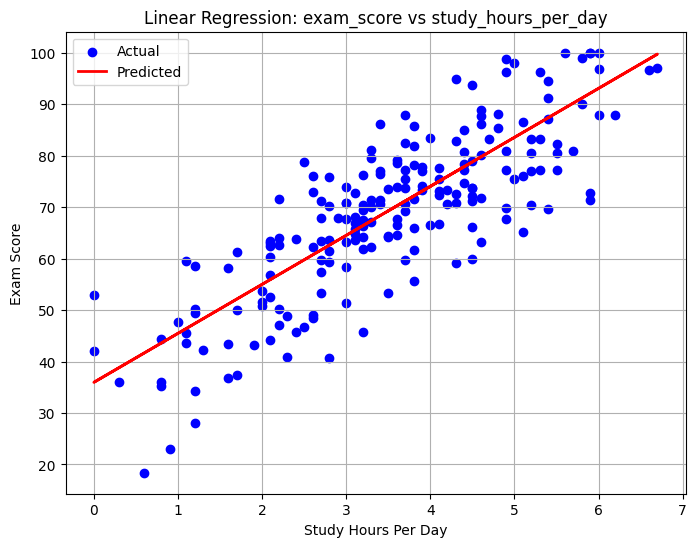

In [6]:
# Select the features and target variable for the new model
X_exam = df[['study_hours_per_day']]
y_exam = df['exam_score']

# Split the data into training and testing sets
X_train_exam, X_test_exam, y_train_exam, y_test_exam = train_test_split(X_exam, y_exam, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg_exam = LinearRegression()

# Train the model
linear_reg_exam.fit(X_train_exam, y_train_exam)

# Make predictions
y_pred_exam = linear_reg_exam.predict(X_test_exam)

# Evaluate the model
mse_exam = mean_squared_error(y_test_exam, y_pred_exam)
r2_exam = r2_score(y_test_exam, y_pred_exam)

print("Linear Regression Model: exam_score vs study_hours_per_day")
print(f"  Mean Squared Error (MSE): {mse_exam:.4f}")
print(f"  R-squared (R^2): {r2_exam:.4f}")

# Optional: Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test_exam, y_test_exam, color='blue', label='Actual')
plt.plot(X_test_exam, y_pred_exam, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: exam_score vs study_hours_per_day')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

#Adding Gradient Boosting and Multi-layer Perceptron Regressor on the original three dataframes as well as the selected_feature dataframe. Graph them on the best model per dataframe


--- Evaluating Models on df ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results for df:
  Model: LR
    Mean Squared Error (MSE): 0.2436
    R-squared (R^2): 0.8762
  Model: DT
    Mean Squared Error (MSE): 0.8388
    R-squared (R^2): 0.5736
  Model: RF
    Mean Squared Error (MSE): 0.3837
    R-squared (R^2): 0.8050
  Model: GBR
    Mean Squared Error (MSE): 0.3394
    R-squared (R^2): 0.8275
  Model: MLP
    Mean Squared Error (MSE): 0.3660
    R-squared (R^2): 0.8139
------------------------------

--- Evaluating Models on df1 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results for df1:
  Model: LR
    Mean Squared Error (MSE): 2.0061
    R-squared (R^2): -0.0198
  Model: DT
    Mean Squared Error (MSE): 4.8868
    R-squared (R^2): -1.4841
  Model: RF
    Mean Squared Error (MSE): 2.2684
    R-squared (R^2): -0.1531
  Model: GBR
    Mean Squared Error (MSE): 2.2688
    R-squared (R^2): -0.1533
  Model: MLP
    Mean Squared Error (MSE): 3.1067
    R-squared (R^2): -0.5792
------------------------------

--- Evaluating Models on df2 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results for df2:
  Model: LR
    Mean Squared Error (MSE): 0.4812
    R-squared (R^2): 0.7554
  Model: DT
    Mean Squared Error (MSE): 0.8990
    R-squared (R^2): 0.5430
  Model: RF
    Mean Squared Error (MSE): 0.6325
    R-squared (R^2): 0.6785
  Model: GBR
    Mean Squared Error (MSE): 0.5279
    R-squared (R^2): 0.7317
  Model: MLP
    Mean Squared Error (MSE): 0.5025
    R-squared (R^2): 0.7446
------------------------------

--- Evaluating Models on df_selected_features ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Results for df_selected_features:
  Model: LR
    Mean Squared Error (MSE): 0.5573
    R-squared (R^2): 0.7167
  Model: DT
    Mean Squared Error (MSE): 1.4273
    R-squared (R^2): 0.2745
  Model: RF
    Mean Squared Error (MSE): 0.6972
    R-squared (R^2): 0.6456
  Model: GBR
    Mean Squared Error (MSE): 0.6439
    R-squared (R^2): 0.6727
  Model: MLP
    Mean Squared Error (MSE): 0.7455
    R-squared (R^2): 0.6210
------------------------------


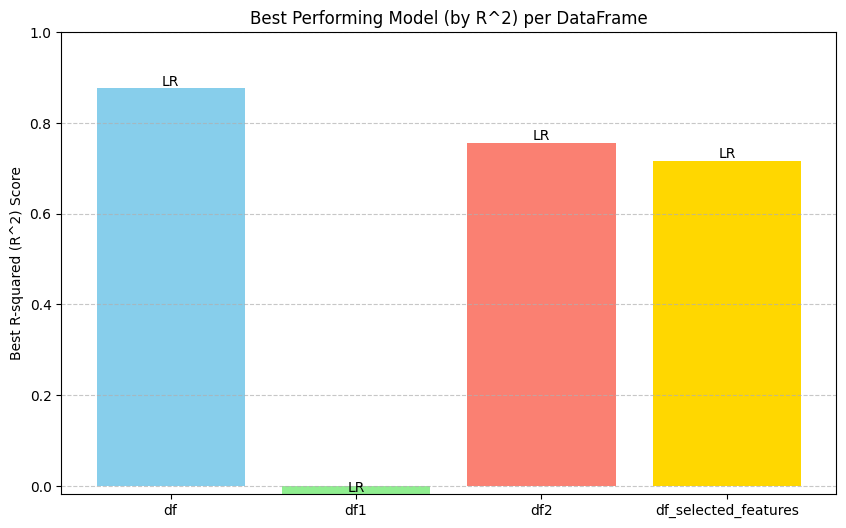

In [15]:
# Adding Gradient Boosting and Multi-layer Perceptron Regressor on df, df1, df2, and df_selected_features. Graph them on the best model per dataframe. Shorten the models name to LR, RF, DT, GBR and MLP.
#!pip install scikeras

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

def build_mlp_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_dim,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1)) # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

def model_extended(df, df_name):
    print(f"\n--- Evaluating Models on {df_name} ---")
    # Separate features and target variable
    # Handle the case where the target column 'study_hours_per_day' might be the only column
    if 'study_hours_per_day' not in df.columns or df.shape[1] == 1:
        print(f"Skipping {df_name}: 'study_hours_per_day' column not found or only target column exists.")
        return None, None # Return None if skipping

    X = df.drop('study_hours_per_day', axis=1)
    y = df['study_hours_per_day']

    # Check if X is empty after dropping the target
    if X.empty:
        print(f"Skipping {df_name}: No features available after dropping 'study_hours_per_day'.")
        return None, None # Return None if skipping

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale data for MLP
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    # Initialize models with shortened names
    models = {
        "LR": LinearRegression(),
        "DT": DecisionTreeRegressor(random_state=42),
        "RF": RandomForestRegressor(random_state=42),
        "GBR": GradientBoostingRegressor(random_state=42),
        "MLP": KerasRegressor(model=build_mlp_model, input_dim=X_train_scaled.shape[1], epochs=100, batch_size=32, verbose=0)
    }

    # Train models and evaluate
    results = {}
    for name, model in models.items():
        try:
            if name == "MLP":
                 model.fit(X_train_scaled, y_train)
                 y_pred = model.predict(X_test_scaled)
            else:
                 model.fit(X_train, y_train)
                 y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            results[name] = {"MSE": mse, "R^2": r2}
        except Exception as e:
             print(f"Error training {name} on {df_name}: {e}")
             results[name] = {"MSE": np.inf, "R^2": -np.inf} # Indicate failure

    # Print results
    best_model_name = None
    best_r2 = -np.inf
    print(f"Results for {df_name}:")
    for name, metrics in results.items():
        print(f"  Model: {name}")
        print(f"    Mean Squared Error (MSE): {metrics['MSE']:.4f}")
        print(f"    R-squared (R^2): {metrics['R^2']:.4f}")
        if metrics['R^2'] > best_r2:
            best_r2 = metrics['R^2']
            best_model_name = name
    print("-" * 30)

    return results, best_model_name # Return results and best model name

# Evaluate models on each dataframe and store results
results_df, best_model_df = model_extended(df, "df")
results_df1, best_model_df1 = model_extended(df1, "df1")
results_df2, best_model_df2 = model_extended(df2, "df2")
results_df_selected, best_model_df_selected = model_extended(df_selected_features, "df_selected_features")


# Prepare data for plotting the best R^2 score per dataframe
best_r2_scores = {}
best_model_names = {}

if results_df is not None:
    best_r2_df = max(results_df.values(), key=lambda x: x['R^2'])['R^2']
    best_r2_scores['df'] = best_r2_df
    best_model_names['df'] = best_model_df

if results_df1 is not None:
    best_r2_df1 = max(results_df1.values(), key=lambda x: x['R^2'])['R^2']
    best_r2_scores['df1'] = best_r2_df1
    best_model_names['df1'] = best_model_df1


if results_df2 is not None:
    # Check if df2 has features other than the target before finding max R^2
    if results_df2: # Check if results_df2 is not empty
        best_r2_df2 = max(results_df2.values(), key=lambda x: x['R^2'])['R^2']
        best_r2_scores['df2'] = best_r2_df2
        best_model_names['df2'] = best_model_df2

if results_df_selected is not None:
     best_r2_df_selected = max(results_df_selected.values(), key=lambda x: x['R^2'])['R^2']
     best_r2_scores['df_selected_features'] = best_r2_df_selected
     best_model_names['df_selected_features'] = best_model_df_selected

# Plot the best R^2 score for each dataframe
plt.figure(figsize=(10, 6))
df_names = list(best_r2_scores.keys())
r2_values = list(best_r2_scores.values())
model_labels = [best_model_names[df_name] for df_name in df_names]

bars = plt.bar(df_names, r2_values, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.ylabel('Best R-squared (R^2) Score')
plt.title('Best Performing Model (by R^2) per DataFrame')
plt.ylim(min(0, min(r2_values) * 0.9), max(1.0, max(r2_values) * 1.1)) # Adjust y-axis limits


# Add model names on top of bars
for bar, label in zip(bars, model_labels):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, label, va='bottom', ha='center') # va: vertical alignment

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()